In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ast import literal_eval

In [4]:
ted_talks = pd.read_csv("../data/ted_talks_prepro.csv")
ted_talks.head(2)

,talk_id,title,speaker,occupations,about_speaker,views,recorded_date,published_date,event,comments,duration,topics,related_talks,description,transcript
0,1,Averting the climate crisis,Al Gore,['climate advocate'],Nobel Laureate Al Gore focused the world’s att...,3523392,2006-02-25,2006-06-27,TED2006,272,977,"['alternative energy', 'cars', 'climate change...","[243, 547, 2093, 54715, 29968, 2339]",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,2,Simple designs to save a life,Amy Smith,"['inventor', 'engineer']","Amy Smith designs cheap, practical fixes for t...",1724438,2006-02-24,2006-08-15,TED2006,101,906,"['MacArthur grant', 'alternative energy', 'des...","[1561, 1072, 1184, 1406, 767, 285]",Fumes from indoor cooking fires kill more than...,"In terms of invention, I'd like to tell you th..."


# Les plus vus

In [52]:
most_viewed = ted_talks[["title", "views"]].sort_values(by='views', ascending=False).head(10).reset_index(drop=True)
most_viewed

,title,views
0,Do schools kill creativity?,65051954
1,Your body language may shape who you are,57074270
2,This is what happens when you reply to spam email,56932551
3,How great leaders inspire action,49730580
4,The power of vulnerability,47544833
5,How to speak so that people want to listen,41504331
6,Inside the mind of a master procrastinator,37976820
7,"Looks aren't everything. Believe me, I'm a model.",33874546
8,My philosophy for a happy life,33691484
9,The next outbreak? We're not ready,33521780


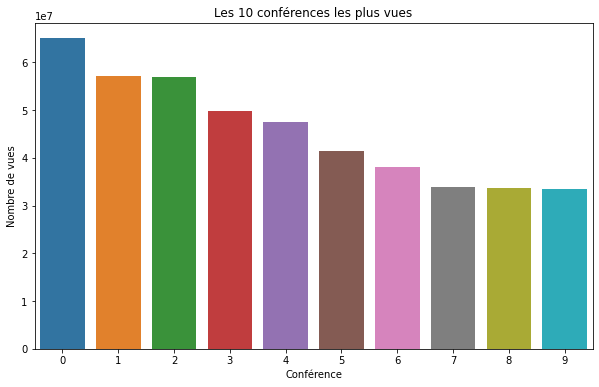

In [51]:
plt.figure(figsize=(10, 6))

sns.barplot(x=list(range(10)), y=most_viewed.views)
plt.title("Les 10 conférences les plus vues")
plt.xlabel("Conférence")
plt.ylabel("Nombre de vues")
plt.show()

# Durées

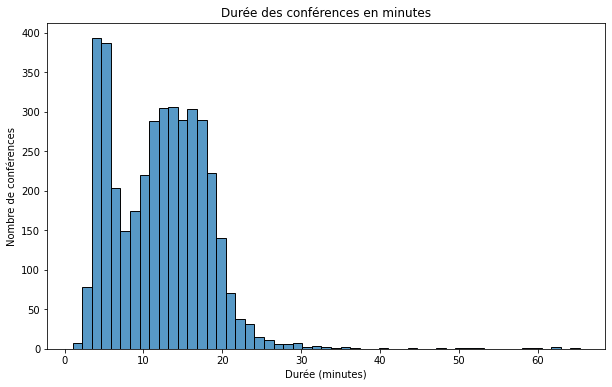

In [40]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks.duration / 60)
plt.title("Durée des conférences en minutes")
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de conférences")
plt.show()

# Corrélations

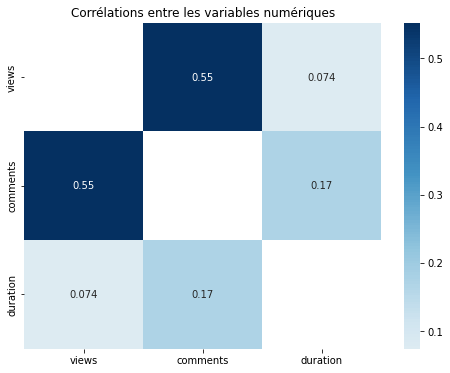

In [81]:
plt.figure(figsize=(8, 6))

sns.heatmap(ted_talks.drop("talk_id", axis=1).corr(), mask=np.eye(3), annot=True, cmap="RdBu", center=0)
plt.title("Corrélations entre les variables numériques")
plt.show()

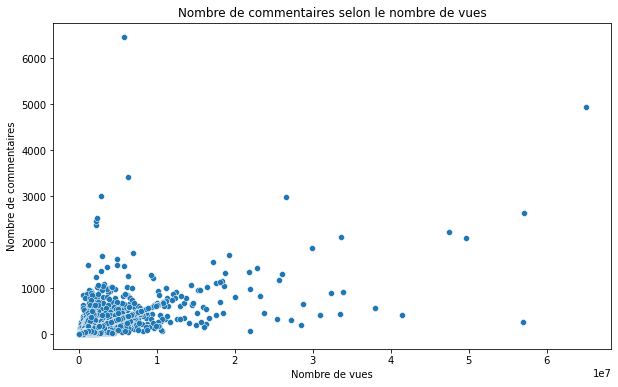

In [88]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=ted_talks.views, y=ted_talks.comments)
plt.title("Nombre de commentaires selon le nombre de vues")
plt.xlabel("Nombre de vues")
plt.ylabel("Nombre de commentaires")
plt.show()

# Thèmes à débat

In [130]:
ted_talks["comment_rate"] = ted_talks.comments / ted_talks.views * 1e6

<AxesSubplot:xlabel='comment_rate', ylabel='Count'>

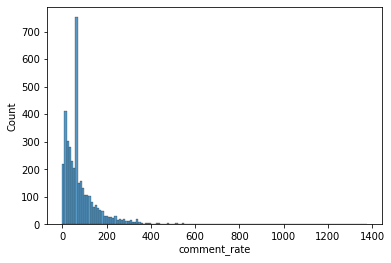

In [131]:
sns.histplot(ted_talks["comment_rate"])

In [140]:
most_commented_topics = ted_talks.sort_values(by="comment_rate", ascending=False).topics.head(100)

most_commented_topics = most_commented_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_commented_topics = most_commented_topics[most_commented_topics > 10]

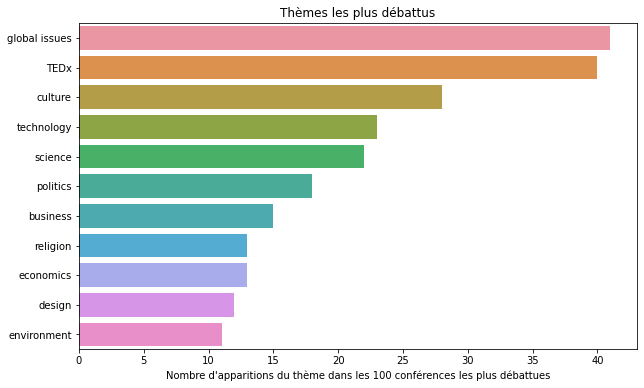

In [148]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus débattus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus débattues")
plt.show()

# Thèmes les plus vus

In [149]:
most_commented_topics = ted_talks.sort_values(by="views", ascending=False).topics.head(100)

most_commented_topics = most_commented_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_commented_topics = most_commented_topics[most_commented_topics > 10]

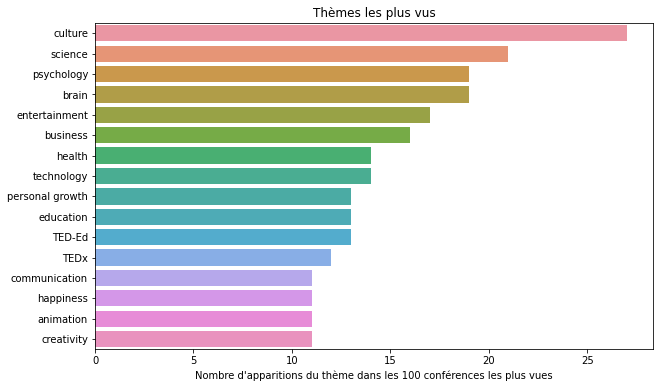

In [151]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus vus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus vues")
plt.show()

# Orateurs

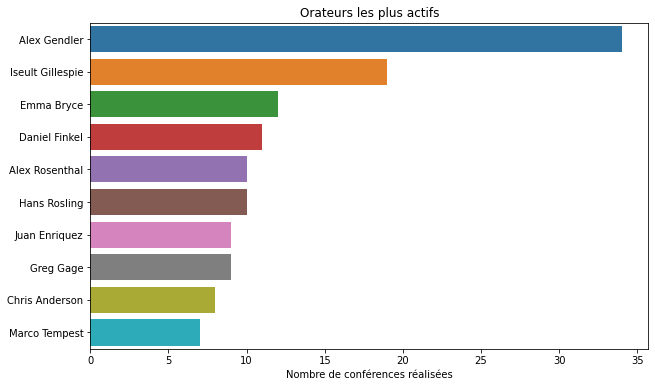

In [156]:
plt.figure(figsize=(10, 6))

frequent_speakers = ted_talks.speaker.value_counts().head(10)

sns.barplot(x=frequent_speakers, y=frequent_speakers.index)
plt.title("Orateurs les plus actifs")
plt.xlabel("Nombre de conférences réalisées")
plt.show()

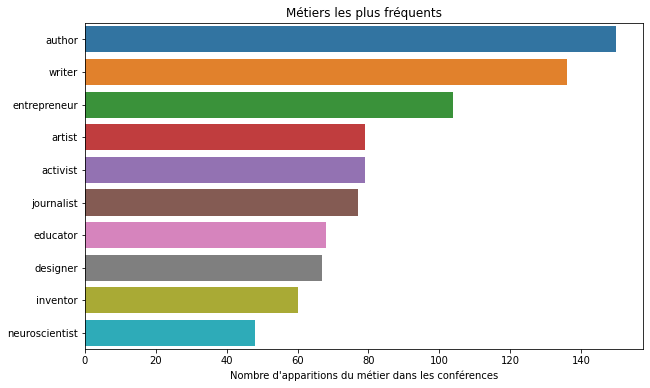

In [166]:
most_common_occupations = ted_talks.occupations.apply(lambda x: literal_eval(x)).explode().value_counts()[1:].head(10)

plt.figure(figsize=(10, 6))

sns.barplot(x=most_common_occupations, y=most_common_occupations.index)
plt.title("Métiers les plus fréquents")
plt.xlabel("Nombre d'apparitions du métier dans les conférences")
plt.show()